## EE4708: Data Analytics Lab - Mid Semester Examination

### Date: September 30, 2029 
### Duration: 3 hrs
### Max. Marks: 30

### Roll Number : EE17B113


### Instructions:

1) Write your roll number is the cell above. 

2) All questions are to be answered in this jupyter notebook only, including any assumptions and observations. The cells have been provided as needed but you can add new cells if required.

3) There are 3 main questions with multiple sub-questions. The corresponding datasets are to be downloaded from the google drive folder link provided. You have to strictly use the datasets provided in the folder bearing your roll number and evaluation will be based only on that. If you use any other dataset, you will be marked zero.  

4) In the codes, any python packages/functions discussed in the course can be used unless mentioned otherwise in the question. 

5) Any parameters required for using an inbuilt python function may be chosen appropriately.   

6) You are free to use any resources at your disposal (assignments, text books, internet, etc.) but you are strictly forbidden from discussing with other students. There will be harsh penalties if two or more people are found to have submitted exactly the same code.

7) For any doubts during the exam, the TAs will be available continuously between 2 pm and 5 pm on a google meet session to clarify your doubts. Joining this session is optional and only to clarify any doubts. Here is the link to the session: https://meet.google.com/mai-ixxh-jaq

8) The codes are only verified for desired functionality and not for speed/efficiency. 


### Question 1: Linear/Polynomial Regression (10 Marks)

Consider the given regression dataset which has 18 input features (x1 to x18)  and a target variable (y). Write a code in the cells provided to perform the following (1.1 to 1.7) on the given dataset:

1.1) Standardise or Normalise the features if deemed necessary

1.2) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("EE17B113/Linear Regression Dataset_33.csv")

In [3]:
y = data['y'].values.reshape(-1,1)
X = data[set(data.columns)-set(['y'])].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [5]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(800, 18) (200, 18)
(800, 1) (200, 1)


In [6]:
# Standardising since Lasso feature selection is asked

st = StandardScaler()

X_train_st = st.fit_transform(X_train)
X_test_st = st.transform(X_test)

1.3) Learn polynomial regression models of degrees 1, 2 and 3 and print the R^2 score for all the models

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
models = []
train_errors = []
test_errors = []
for i in range(1,4):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train_st)
    print("Model with degree =",i)
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train_poly,y_train)
    tr_e = r2_score(y_train,model.predict(X_train_poly))
    train_errors.append(tr_e)
    print("\tTrain Error :",tr_e)
    X_test_poly = poly.transform(X_test_st)
    ts_e = r2_score(y_test,model.predict(X_test_poly))
    test_errors.append(ts_e)
    print("\tValidation Error :",ts_e,'\n')

Model with degree = 1
	Train Error : 0.7593724171237896
	Validation Error : 0.7909338199279644 

Model with degree = 2
	Train Error : 0.926449652668039
	Validation Error : 0.39487065429591583 

Model with degree = 3
	Train Error : 1.0
	Validation Error : -2113.078934333943 



1.4) Which among the 3 models would you chose based on the R^2 score and why ? (Write your answer below) 

Model with degree = 1 would be the best since it has the best R^2 score in the validation dataset.

1.5) On the above chosen polynomial model, apply L1 regularisation (LASSO) with alpha = 0.01 and print the LASSO model coefficients. 

In [9]:
from sklearn.linear_model import Lasso

In [10]:
model = Lasso(alpha=0.01,fit_intercept=False)
poly = PolynomialFeatures(degree=1)

X_train_poly = poly.fit_transform(X_train_st)
model.fit(X_train_poly,y_train)

Lasso(alpha=0.01, fit_intercept=False)

1.6) Select features from the LASSO model with a coefficient threshold of 0.001. List below the selected features by their label names (i.e, x1,x2,...)


In [11]:
print(["x"+str(i+1) for i in np.where(np.abs(model.coef_[1:])>0.001)[0]])

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']


The features selected by LASSO model are 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', i.e. all the features have been selected.


1.7) With the above chosen features, learn the polynomial regression model of chosen degree (in Q. 1.4) and print the  regression coefficients, mean squared error of predictions on validation set and R^2 score on the validation set. 

In [12]:
model_final = LinearRegression(fit_intercept=False)


poly = PolynomialFeatures(degree=1)

X_train_poly = poly.fit_transform(X_train_st)
model.fit(X_train_poly,y_train)

X_test_poly = poly.transform(X_test_st)

print("Coefficients :",model.coef_.tolist(),'\n')
print("MSE Error :",mean_squared_error(y_test,model.predict(X_test_poly)),'\n')
print("R^2 Score :",r2_score(y_test,model.predict(X_test_poly)),'\n')

Coefficients : [69.47227252866976, 1.170017315122738, -0.49115507418389437, -2.598742037971366, -0.44838756119384243, 3.0066800920431658, 0.39460051026453535, 0.7186234438461108, 9.514853855396856, -9.247210908817195, 0.8537113617384823, -2.307900137239841, 0.25822837741414995, 0.25873345553959626, -0.4033048225865138, 0.2928491588441652, 1.1749074141744593, -0.14746251520638656, -0.31731740775315415] 

MSE Error : 18.716418469367213 

R^2 Score : 0.7911073816937368 



### Question 2: Naive Baye's Classifier (10 Marks)

Consider the given naive bayes classification dataset which has 10 input features (x1 to x10) and a target class (y). The samples come from 3 different classes labelled 0, 1 and 2. Perform the following (2.1 to 2.4) on the given dataset:

2.1) Use train_test_split function in sklearn with random_state = 42  to split the dataset into train and validation sets in the ratio of 80:20


In [90]:
data = pd.read_csv("EE17B113/Naive_Bayes_Dataset_33.csv")

data

x1        x2        x3        x4        x5        x6        x7  \
0   -3.364363 -1.830350  0.420545  0.744564 -0.431720 -4.841922  2.235383   
1    0.050510 -0.881934  2.757558 -0.838081 -1.504136 -1.840437 -0.423329   
2    2.657809  3.286058 -1.527602  2.947351 -1.500329  3.387374 -3.171896   
3    0.235972 -2.309880  1.658473 -0.191327  4.359119  3.226423  0.264076   
4   -0.401140  0.728190 -1.131079 -1.478193 -1.016404 -1.214197  0.733565   
..        ...       ...       ...       ...       ...       ...       ...   
995  2.407269 -1.299487 -3.096209 -2.651825 -0.693633  0.573310  0.223511   
996 -0.478944  1.811401  2.493546 -0.602623 -3.629204 -2.764517  0.212820   
997  2.118022  1.589870 -2.143390  0.903045 -2.157586  0.975314 -1.517027   
998  1.123393 -0.831422 -1.045194 -1.815558  0.044015  0.561374  1.091844   
999  1.006537 -2.834862 -0.621310 -2.052361  3.826735  3.017859  2.305998   

           x8        x9       x10  y  
0    2.228471 -0.830772 -5.073946  1  
1    1.573968 -0.093955  3.906343  2  
2    1.856556  0.249984  0.521994  1  
3   -0.506547 -2.000994  2.520818  2  
4   -2.758655  1.650629 -0.872197  1  
..        ...       ...       ... ..  
995 -2.125617  1.515622  0.830220  0  
996 -1.183636  0.355459  2.135174  1  
997 -0.170576  0.907040 -0.147119  1  
998 -0.885142 -0.405033  0.136127  2  
999 -2.077473 -2.454056  0.069217  2  

[1000 rows x 11 columns]

In [91]:
y = data['y'].values
x_cols = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X = data[x_cols].values

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [93]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

2.2) Learn a Gaussian Naive Bayes classifier model from scratch using only functions from math, pandas, numpy and scipy packages (sklearn is not allowed for this step). Using this model, predict the classes of samples in validation set and print the accuracy of predictions.  

In [94]:
from scipy.stats import norm
from sklearn.metrics import accuracy_score

In [95]:
c_0 = np.sum(y_train==0)/len(y_train)
c_1 = np.sum(y_train==1)/len(y_train)
c_2 = np.sum(y_train==2)/len(y_train)

In [96]:
mean_0 = np.mean(X_train_sc[(y_train==0),:],axis = 0)
mean_1 = np.mean(X_train_sc[(y_train==1),:],axis = 0)
mean_2 = np.mean(X_train_sc[(y_train==2),:],axis = 0)

var_0 = np.var(X_train_sc[(y_train==0),:],axis = 0)
var_1 = np.var(X_train_sc[(y_train==1),:],axis = 0)
var_2 = np.var(X_train_sc[(y_train==2),:],axis = 0)

In [97]:
preds = []
for x in X_test_sc:
    p_0 = np.mean(norm.pdf(x,mean_0,var_0))
    p_1 = np.mean(norm.pdf(x,mean_1,var_1))
    p_2 = np.mean(norm.pdf(x,mean_2,var_2))
    preds.append(np.argmax([c_0*p_0,c_1*p_1,c_2*p_2]))

print(accuracy_score(y_test,preds))

0.54


2.3) Perform Feature selection as mentioned in the following steps 2.3.1 to 2.3.4: 

2.3.1) For each feature $x_i$, plot the three gaussian curves of $P(x_i| y=0) , P(x_i | y=1)$ and $P(x_i | y=2)$ using the mean and variance calculated while building the naive bayes model. Ensure that all the plots are labelled properly. There should be 10 plots pertaining to 10 features with each plot having 3 gaussian curves corresponding to 3 classes. 
 


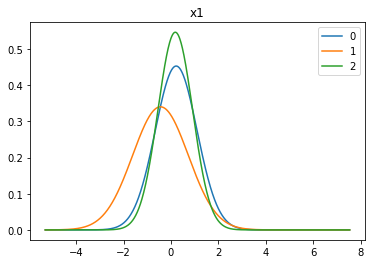

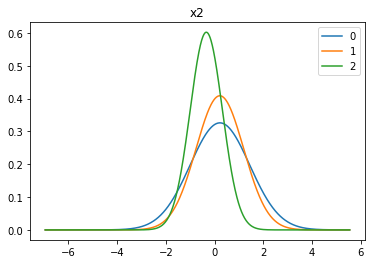

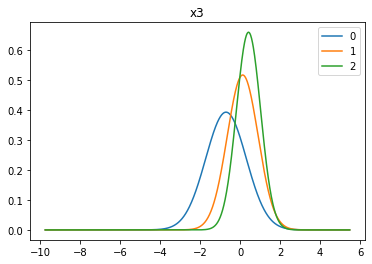

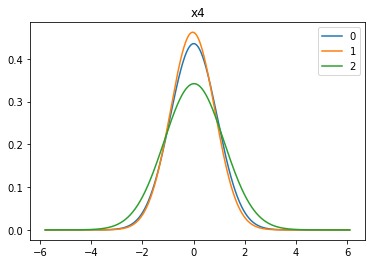

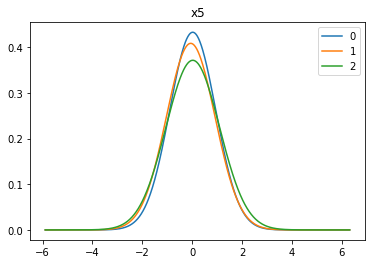

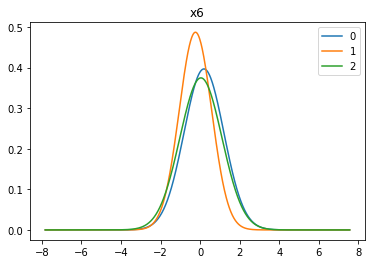

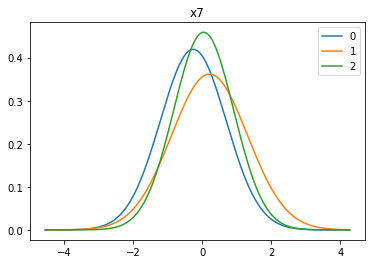

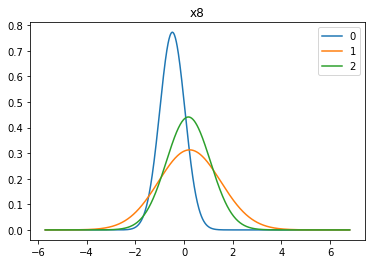

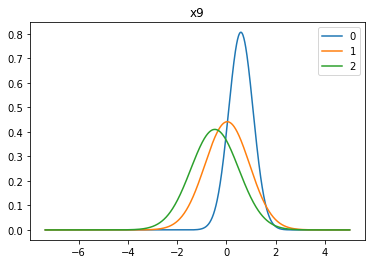

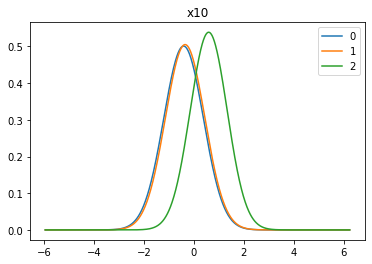

In [98]:
for i in range(X_train.shape[1]):
    x_i = X_train[:,i]
    x_r = np.linspace(x_i.min(),x_i.max(),1000)
    plt.title("x"+str(i+1))
    plt.plot(x_r,norm.pdf(x_r,mean_0[i],var_0[i]),label = "0")
    plt.plot(x_r,norm.pdf(x_r,mean_1[i],var_1[i]),label = "1")
    plt.plot(x_r,norm.pdf(x_r,mean_2[i],var_2[i]),label = "2")
    plt.legend()
    plt.show()

2.3.2) Among the 10 plots, observe the ones with significant overlapping gaussian curves. It indicates that the particular feature is not well separated across classes and is not much relevant in predicting the class using bayes rule. Remove the features one by one starting with most significant overlap as observed in the plots and build a naive bayes model with the rest of the features. Find the accuracy of model predictions on the validation set. Continue removing features as long as  the accuracy of prediction on the validation set improves, otherwise stop. 

In [99]:
# All features
feat = [0,1,2,7,8]
preds = []
for x in X_test_sc:
    p_0 = np.mean(norm.pdf(x[feat],mean_0[feat],var_0[feat]))
    p_1 = np.mean(norm.pdf(x[feat],mean_1[feat],var_1[feat]))
    p_2 = np.mean(norm.pdf(x[feat],mean_2[feat],var_2[feat]))
    preds.append(np.argmax([c_0*p_0,c_1*p_1,c_2*p_2]))

pred = accuracy_score(y_test,preds)

print(pred)

0.56


In [100]:
# Manually Calculated
accs = [0.54,0.545,0.55,0.545,0.55,0.56,0.55,0.53,0.52,0.5]
accs.reverse()

2.3.3) List below the selected and removed features by their label names (i.e, x1,x2,...)

Selected Feautures : x1,x3,x4,x5,x10

Removed Features : x2,x6,x7,x8,x9

2.3.4) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in 2.3.2 

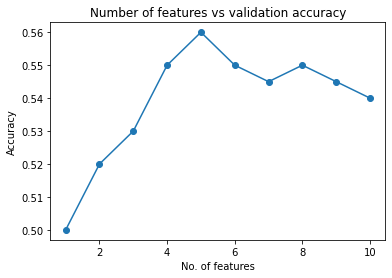

In [101]:
plt.title("Number of features vs validation accuracy")
x_s = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(x_s,accs)
plt.plot(x_s,accs)
plt.xlabel("No. of features")
plt.ylabel("Accuracy")
plt.show()

2.4) Based on the naive bayes model with selected features, print the accuracy of predictions on the validation set.

In [102]:
print("Accuracy with selected features :",pred)

Accuracy with selected features : 0.56


### Question 3: Logistic Regression Classifier (10 Marks)

Consider the given logistic regression dataset which has 9 input features (x1 to x9)  and a target class (y). The samples come from 2 different classes labelled 0 and 1. Perform the following on the given dataset:

3.1) There are two categorical features (x5 and x6) in the dataset. Encode these features appropriately. Mention as a comment how the encoding is being performed.

3.2) Standardise of Normalise the features if deemed necessary

3.3) Use train_test_split function in sklearn with random_state = 0  to split the dataset into train and validation sets in the ratio of 80:20

In [103]:
data = pd.read_csv('EE17B113/Logistic Regression Dataset_33.csv')

print(data['x5'].unique())
print(data['x6'].unique())

['1-2 Year' '< 1 Year' '> 2 Years']
['Yes' 'No']


In [27]:
x5_oh = pd.get_dummies(data['x5'],prefix="x5")

data = data.drop('x5',axis = 1)
data = data.join(x5_oh)

In [28]:
data['x6'] = data['x6'].apply(lambda x:1 if x=="Yes" else 0)

In [51]:
data.head()

x1  x2    x3  x4  x6       x7     x8   x9  y  x5_1-2 Year  x5_< 1 Year  \
0  48   1  28.0   0   1  53099.0  124.0  248  0            1            0   
1  66   1  28.0   0   1  42088.0  124.0  158  0            1            0   
2  40   1  50.0   1   0  28747.0  124.0   65  0            1            0   
3  39   1  25.0   0   1   2630.0  156.0  190  1            1            0   
4  49   1  28.0   1   0  47198.0   26.0  107  0            1            0   

   x5_> 2 Years  
0             0  
1             0  
2             0  
3             0  
4             0

In [52]:
n_cols = ['x1','x2','x3','x4','x7','x8','x9']

One Hot Encoding works better in x5 since there is no ordinal relationship between the variables. Ordinal Encoding works better in x6 since it is of True/False type

In [41]:
y = data['y']
X = data[set(data.columns)-set(['y'])]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

3.4) Learn a logistic regression model for classification and print the accuracy of the model in predicting the classes of the samples in the validation set. 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [45]:
print("Validation Accuracy :",accuracy_score(y_test,model.predict(X_test)))

Validation Accuracy : 0.879344262295082


3.5) Perform feature selection using ‘RFE’ function (Recursive Feature Elimination) in sklearn and using the function argument, vary the number of features to be selected until the model prediction accuracy obtained on validation set is best possible. Print the best possible accuracy that is obtained.  

In [46]:
from sklearn.feature_selection import RFE

In [47]:
val_accs = []
sels = []
for i in range(1,(X_train.shape[1]+1)):
    sel = RFE(estimator=LogisticRegression(),n_features_to_select=i)
    print("Number of features =",i)
    sel.fit(X_train,y_train)
    sels.append(sel)
    acc = accuracy_score(y_test,sel.predict(X_test))
    print("\tAccuracy =",acc)
    val_accs.append(acc)

Number of features = 1
	Accuracy = 0.879344262295082
Number of features = 2
	Accuracy = 0.879344262295082
Number of features = 3
	Accuracy = 0.879344262295082
Number of features = 4
	Accuracy = 0.879344262295082
Number of features = 5
	Accuracy = 0.879344262295082
Number of features = 6
	Accuracy = 0.879344262295082
Number of features = 7
	Accuracy = 0.879344262295082
Number of features = 8
	Accuracy = 0.879344262295082
Number of features = 9
	Accuracy = 0.879344262295082
Number of features = 10
	Accuracy = 0.879344262295082
Number of features = 11
	Accuracy = 0.879344262295082


In [48]:
print("Maximum Accuracy :",max(val_accs))

Maximum Accuracy : 0.879344262295082


3.6) List the features that were selected and eliminated by their label names (i.e, x1,x2,...).

Feature selection does not work here, since all the combination of features are giving the same accuracy

3.7) Plot a curve (properly labelled) with the validation set accuracy on y-axis and number of features on x-axis as varied in step 3.5

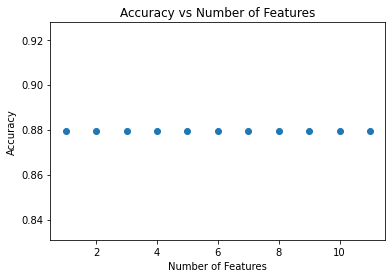

In [49]:
plt.title("Accuracy vs Number of Features")
plt.scatter(range(1,(X_train.shape[1]+1)),val_accs)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.show()

3.8) For the given dataset, give your observations as to what happens with and without standardisation or normalisation of input features. Your observations can be based on above obtained results. You can also run any other code you like to give your observations. 

### Trying Standardization

In [56]:
sc = StandardScaler()

X_train_sc = X_train.copy()
X_train_sc[n_cols] = sc.fit_transform(X_train_sc[n_cols])


X_test_sc = X_test.copy()
X_test_sc[n_cols] = sc.transform(X_test_sc[n_cols])

In [57]:
model = LogisticRegression()

model.fit(X_train_sc,y_train)

LogisticRegression()

In [59]:
print("Validation Accuracy :",accuracy_score(y_test,model.predict(X_test_sc)))

Validation Accuracy : 0.879344262295082


In [60]:
val_accs = []
sels = []
for i in range(1,(X_train.shape[1]+1)):
    sel = RFE(estimator=LogisticRegression(),n_features_to_select=i)
    print("Number of features =",i)
    sel.fit(X_train,y_train)
    sels.append(sel)
    acc = accuracy_score(y_test,sel.predict(X_test))
    print("\tAccuracy =",acc)
    val_accs.append(acc)

Number of features = 1
	Accuracy = 0.879344262295082
Number of features = 2
	Accuracy = 0.879344262295082
Number of features = 3
	Accuracy = 0.879344262295082
Number of features = 4
	Accuracy = 0.879344262295082
Number of features = 5
	Accuracy = 0.879344262295082
Number of features = 6
	Accuracy = 0.879344262295082
Number of features = 7
	Accuracy = 0.879344262295082
Number of features = 8
	Accuracy = 0.879344262295082
Number of features = 9
	Accuracy = 0.879344262295082
Number of features = 10
	Accuracy = 0.879344262295082
Number of features = 11
	Accuracy = 0.879344262295082


In [62]:
# Checking label counts in dataset

cts = np.unique(y,return_counts=True)
print(cts)
print(cts[1][0]/cts[1][1])

(array([0, 1]), array([6689,  934]))
7.161670235546039


As we can see from the above workings, the data for label = 1 is very small, almost 7 times less than that for label = 0. This difference in label is making an huge skew in the model which is making the model predict 0 everytime regardless of the output. Thus it does not matter whether we normalize or not, prediction on the given data is difficult